### **Import Dependencies**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

plt.style.use(style='ggplot')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Exploratory Data Analysis**

<Axes: >

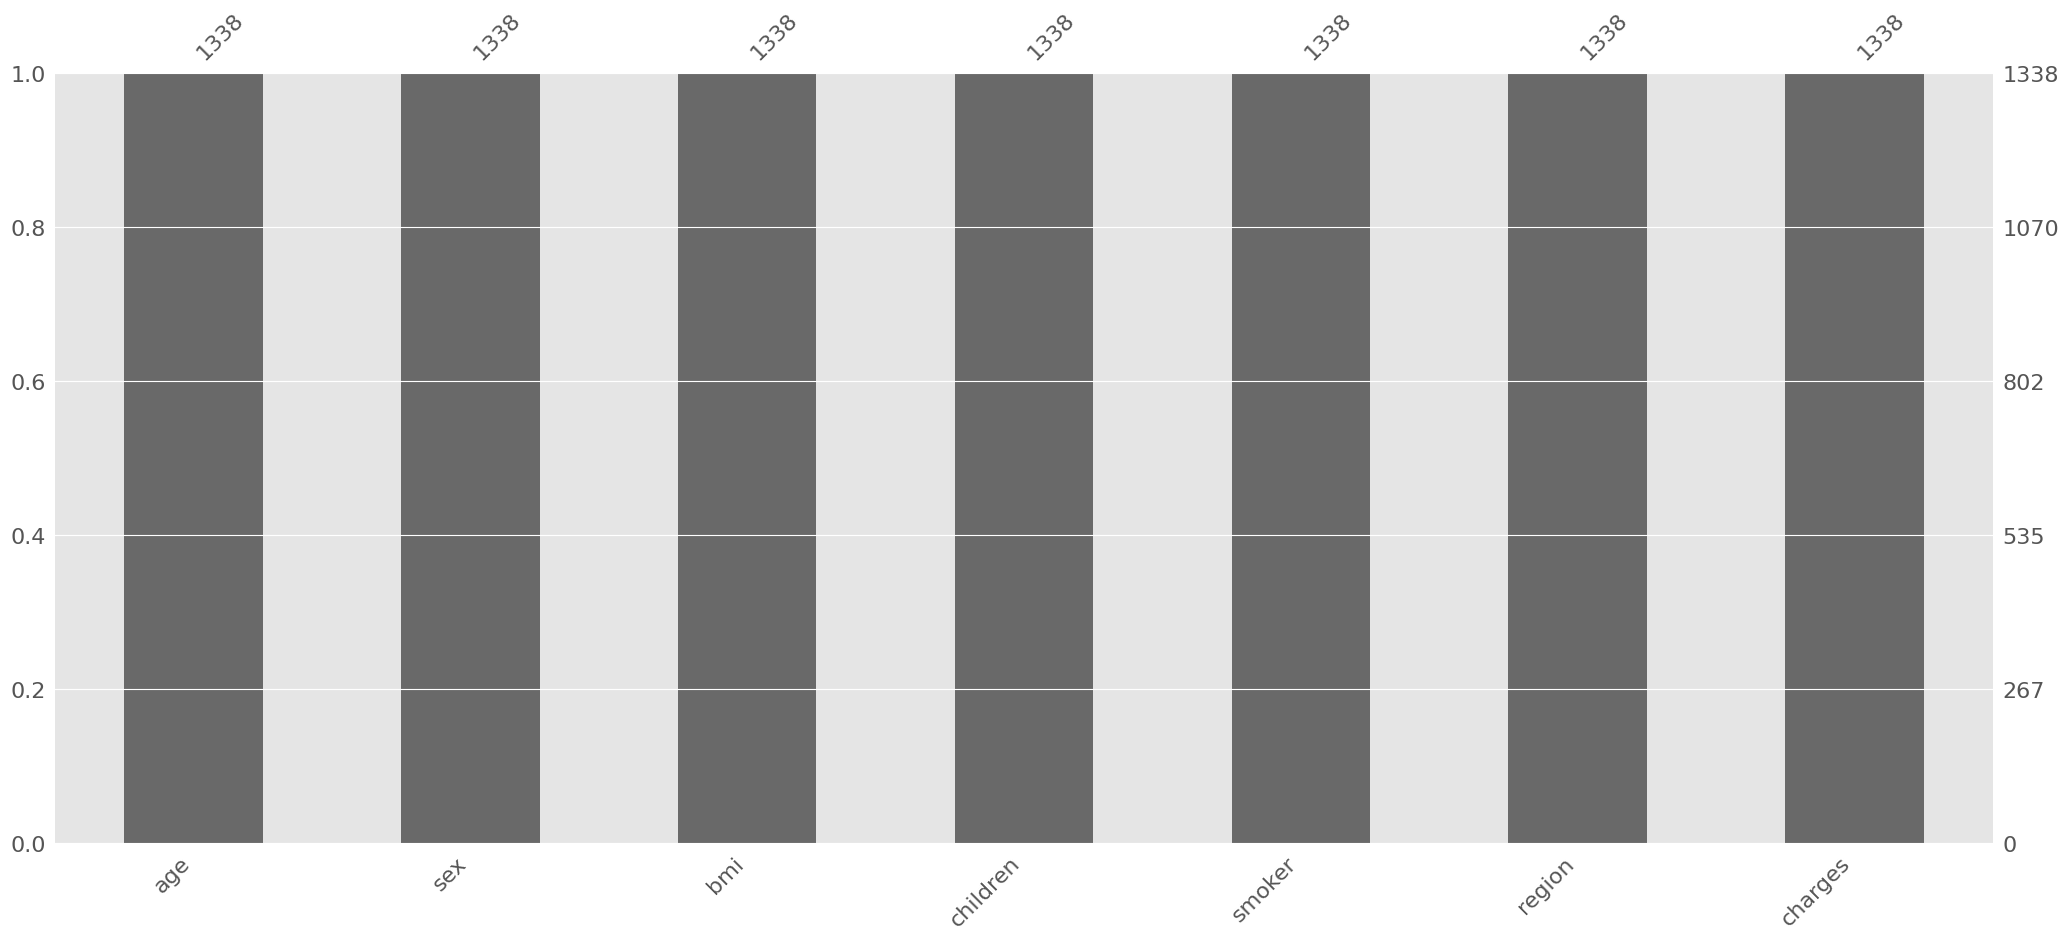

In [3]:
msno.bar(data)

In [4]:
data.duplicated().sum()

np.int64(1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


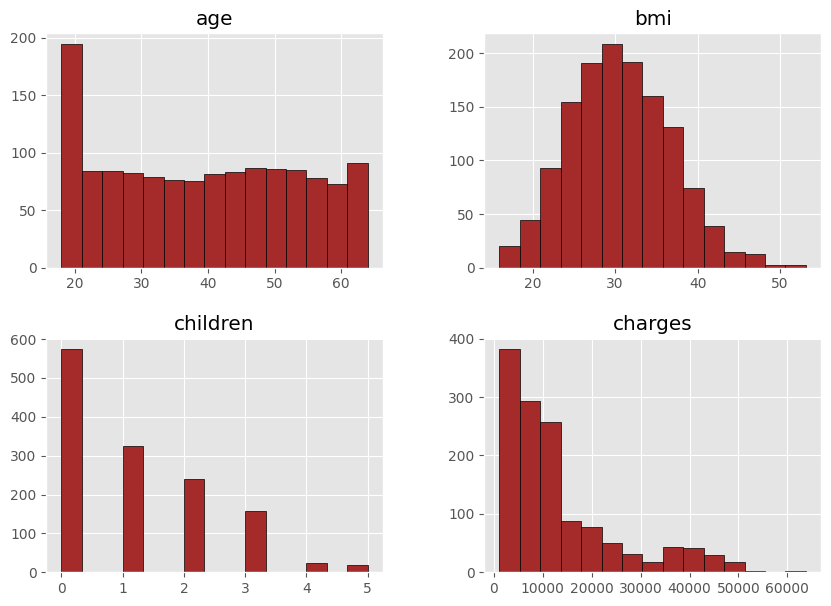

In [7]:
# Check Data Distribution
data.hist(figsize=(10,7), bins=15, color='brown', edgecolor= 'black');

In [8]:
data.select_dtypes('number').skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

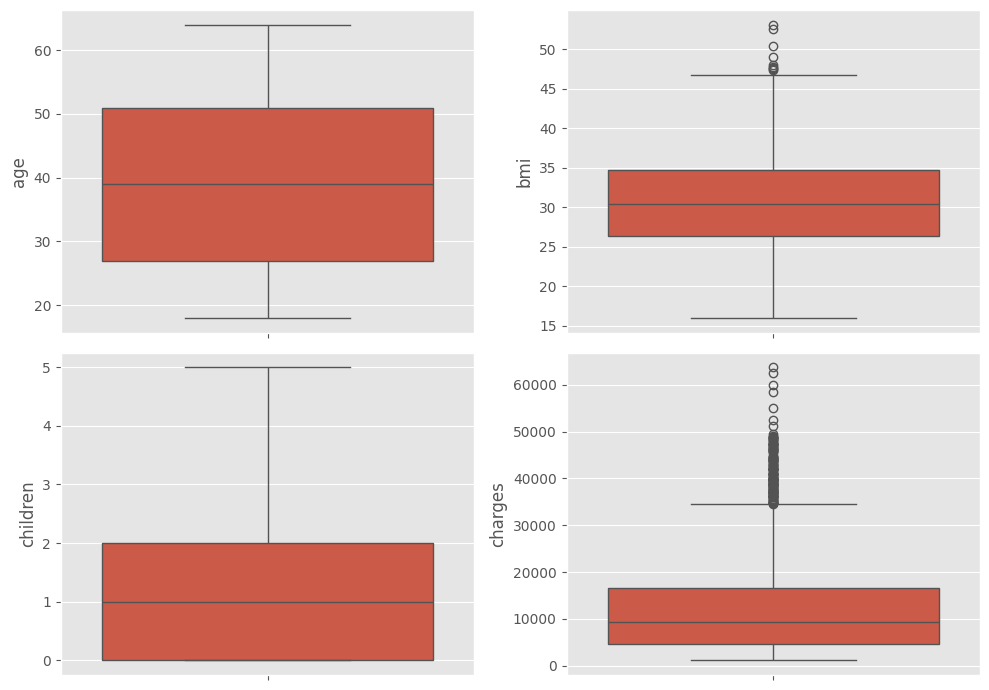

In [9]:
plt.figure(figsize=(10,7))

plt.subplot(2, 2, 1)
sns.boxplot(data['age'])

plt.subplot(2, 2, 2)
sns.boxplot(data['bmi'])

plt.subplot(2, 2, 3)
sns.boxplot(data['children'])

plt.subplot(2, 2, 4)
sns.boxplot(data['charges'])

plt.tight_layout();

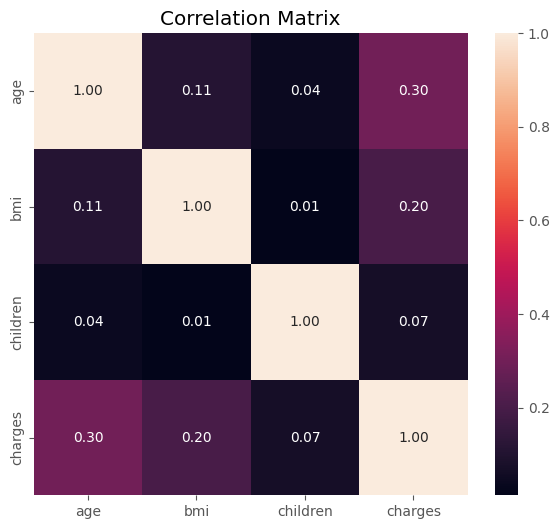

In [10]:
corr = data.select_dtypes('number').corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix');

In [11]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


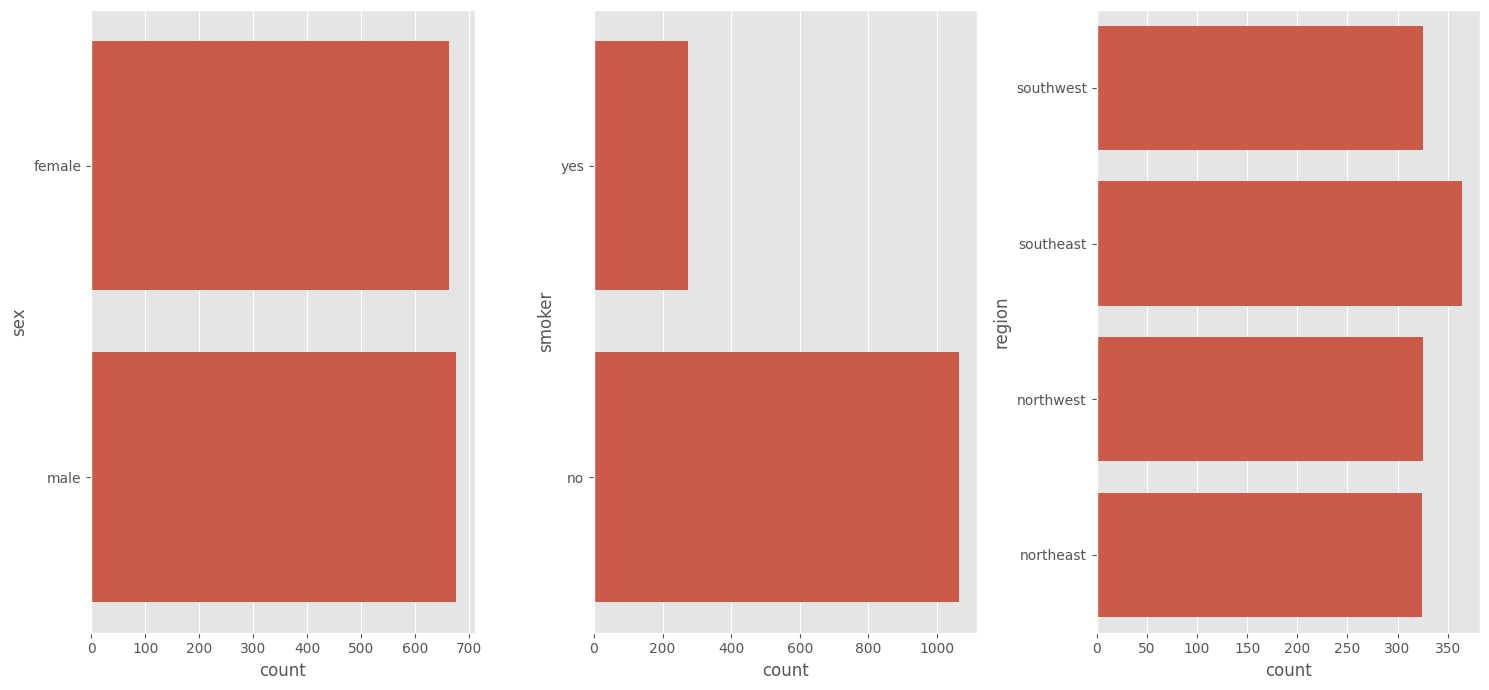

In [12]:
plt.figure(figsize=(15,7))

plt.subplot(1, 3, 1)
sns.countplot(data['sex'])


plt.subplot(1, 3, 2)
sns.countplot(data['smoker'])

plt.subplot(1, 3, 3)
sns.countplot(data['region'])

plt.tight_layout()

### **Data Cleaning**

In [51]:
# Make a copy of the Data
cleaned_data = data.copy()

In [52]:
# Drop Duplicates
cleaned_data.drop_duplicates(inplace=True)

> Transform skewed features

In [53]:

cleaned_data['charges_log_transformed'] = np.log1p(cleaned_data['charges'])

In [54]:
cleaned_data.head()

,age,sex,bmi,children,smoker,region,charges,charges_log_transformed
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455


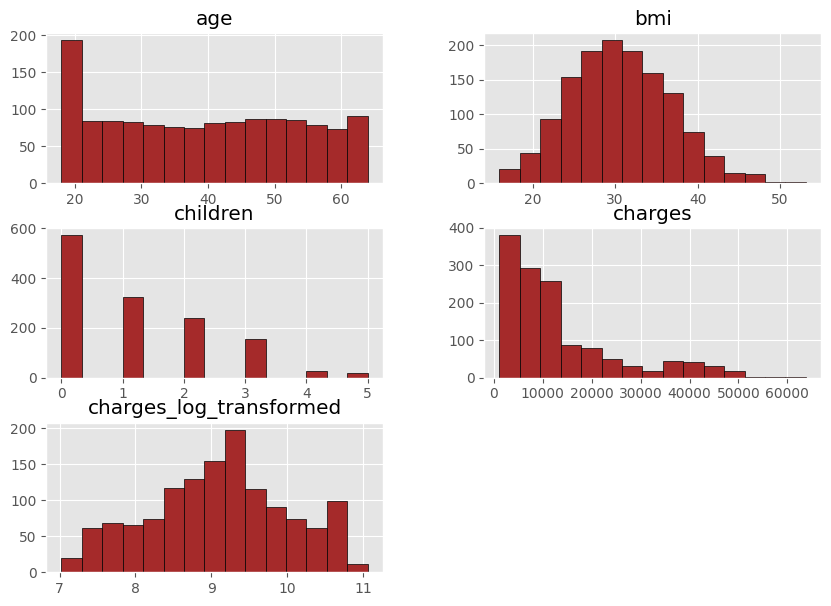

In [55]:
# Check Data Distribution
cleaned_data.hist(figsize=(10,7), bins=15, color='brown', edgecolor= 'black');

In [56]:
cleaned_data.select_dtypes(include='number').skew()

age                        0.054781
bmi                        0.283914
children                   0.937421
charges                    1.515391
charges_log_transformed   -0.089558
dtype: float64

> Handling Outliers

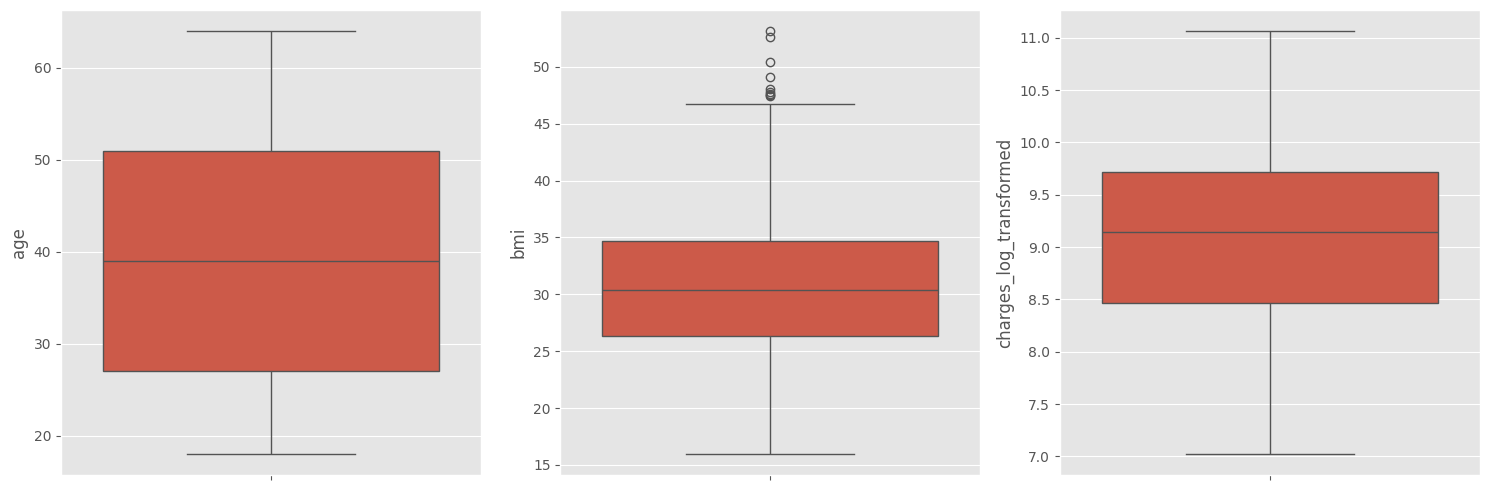

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(cleaned_data['age'])

plt.subplot(1, 3, 2)
sns.boxplot(cleaned_data['bmi'])

plt.subplot(1, 3, 3)
sns.boxplot(cleaned_data['charges_log_transformed'])

plt.tight_layout();

In [58]:
def whiskers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return lower, upper

In [59]:
lower, upper = whiskers(cleaned_data, 'bmi')
cleaned_data['bmi'] = cleaned_data['bmi'].clip(lower, upper)

<Axes: ylabel='bmi'>

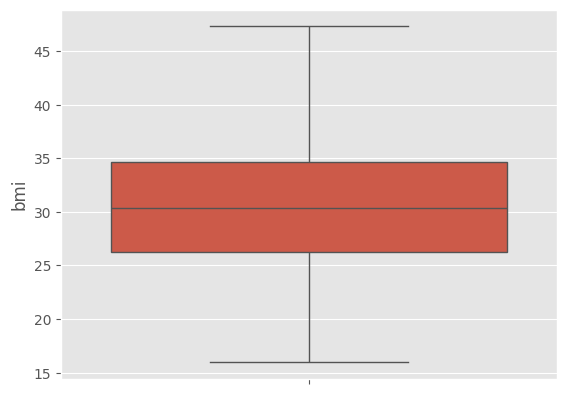

In [60]:
sns.boxplot(cleaned_data['bmi'])

In [61]:
cleaned_data = cleaned_data[['age', 'bmi', 'children', 'sex', 'region', 'smoker', 'charges_log_transformed']]
cleaned_data.head()

,age,bmi,children,sex,region,smoker,charges_log_transformed
0,19,27.900,0,female,southwest,yes,9.734236
1,18,33.770,1,male,southeast,no,7.453882
2,28,33.000,3,male,southeast,no,8.400763
3,33,22.705,0,male,northwest,no,9.998137
4,32,28.880,0,male,northwest,no,8.260455
